In [316]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler  # Changed to MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


In [318]:
# Load dataset
file_path = "readmissionL.xlsx"  # Hubi in file extension-ku yahay .xlsx
df = pd.read_excel(file_path)
df

,Gender,Age,Diagnosis,Days in Hospital,Number of Procedures,Readmitted
0,M,32,Abdominal Injury,9,7,1
1,M,15,Depressed Skull Fracture,3,8,1
2,M,26,Diabetic Foot Gangrene,10,1,0
3,M,33,Multiple Injury,2,2,0
4,F,30,Multiple Injury,3,4,0
...,...,...,...,...,...,...
994,F,23,Diabetic Foot Gangrene,6,9,0
995,M,22,Right Wrist Injury,9,9,1
996,F,23,Left Hand Fingers Injury,5,9,0
997,M,20,Soft Tissue Injury Right Ankle Fracture,2,3,0


In [319]:

# Show basic info
print("🔍 Dataset Overview:")
print(df.info())  # Dataset structure


🔍 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Gender                999 non-null    object
 1   Age                   999 non-null    int64 
 2   Diagnosis             999 non-null    object
 3   Days in Hospital      999 non-null    int64 
 4   Number of Procedures  999 non-null    int64 
 5   Readmitted            999 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB
None


In [320]:
df.head()  # First 5 rows


,Gender,Age,Diagnosis,Days in Hospital,Number of Procedures,Readmitted
0,M,32,Abdominal Injury,9,7,1
1,M,15,Depressed Skull Fracture,3,8,1
2,M,26,Diabetic Foot Gangrene,10,1,0
3,M,33,Multiple Injury,2,2,0
4,F,30,Multiple Injury,3,4,0


In [321]:
print("\n📊 Summary statistics:")
print(df.describe())  # Summary statistics



📊 Summary statistics:
              Age  Days in Hospital  Number of Procedures  Readmitted
count  999.000000        999.000000            999.000000  999.000000
mean    29.671672          7.644645              4.915916    0.434434
std     17.204718          4.110796              2.538469    0.495931
min      5.000000          1.000000              1.000000    0.000000
25%     20.000000          4.000000              3.000000    0.000000
50%     26.000000          8.000000              5.000000    0.000000
75%     35.000000         11.000000              7.000000    1.000000
max     91.000000         14.000000              9.000000    1.000000


In [322]:

# Handle duplicates
print(f"\n❗ Duplicate Rows: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)  # Remove duplicates



❗ Duplicate Rows: 7


In [323]:

# Handle missing values
missing_values = df.isnull().sum()
print("\n🛑 Missing Values per Column:\n", missing_values[missing_values > 0])
df.dropna(subset=['Readmitted'], inplace=True)



🛑 Missing Values per Column:
 Series([], dtype: int64)


In [324]:

# Remove outliers using IQR method
numeric_columns = ['Age', 'Number of Procedures', 'Days in Hospital', ]
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]



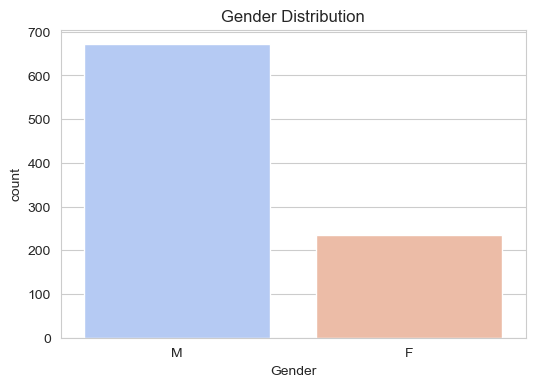

In [325]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', hue='Gender', palette='coolwarm', legend=False)
plt.title("Gender Distribution")
plt.show()


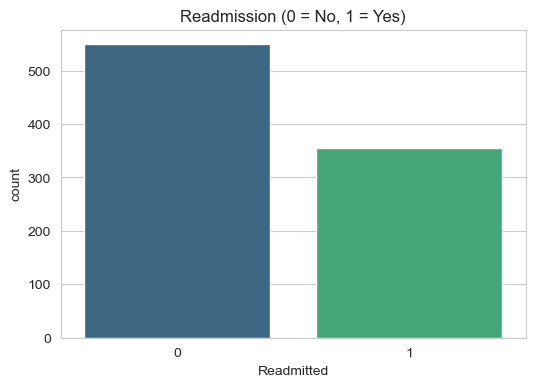

In [326]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Readmitted', hue='Readmitted', palette='viridis', legend=False)
plt.title("Readmission (0 = No, 1 = Yes)")
plt.show()


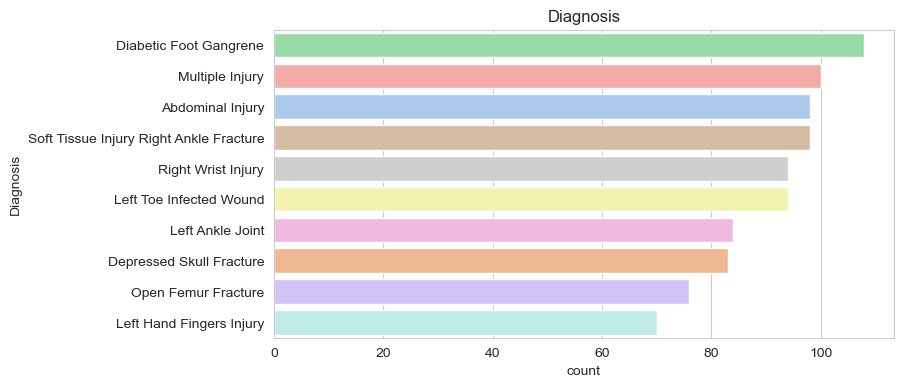

In [327]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, y='Diagnosis', hue='Diagnosis', order=df['Diagnosis'].value_counts().index, palette='pastel', legend=False)
plt.title("Diagnosis")
plt.show()


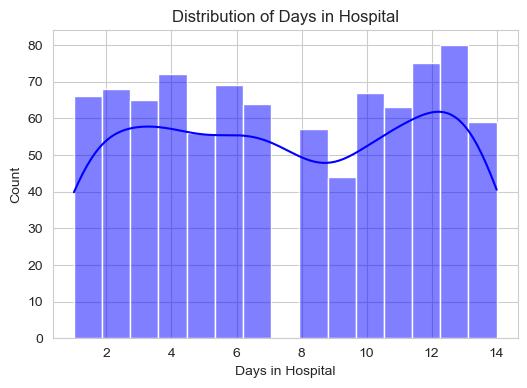

In [328]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Days in Hospital'], bins=15, kde=True, color='blue')
plt.title("Distribution of Days in Hospital")
plt.show()



In [330]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
categorical_columns = ['Gender', 'Diagnosis', 'Readmitted']

for col in categorical_columns:
    df.loc[:, col] = encoder.fit_transform(df[col])  # Encoding categorical columns

# Show the encoded dataframe
print(df.head())


  Gender  Age Diagnosis  Days in Hospital  Number of Procedures  Readmitted
0      1   32         0                 9                     7           1
1      1   15         1                 3                     8           1
2      1   26         2                10                     1           0
3      1   33         6                 2                     2           0
4      0   30         6                 3                     4           0


In [331]:
from sklearn.preprocessing import MinMaxScaler

# Define the numeric columns
numeric_columns = ['Age', 'Number of Procedures', 'Days in Hospital']

# Initialize the scaler
scaler = MinMaxScaler()

# Safely apply the transformation using .loc
df.loc[:, numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Show the updated data
df.head(10)


C:\Users\maxam\AppData\Local\Temp\ipykernel_9548\3237063218.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.52941176 0.19607843 0.41176471 0.54901961 0.49019608 0.49019608
 0.68627451 0.37254902 0.15686275 0.35294118 0.68627451 0.31372549
 0.45098039 0.76470588 0.58823529 0.         0.58823529 0.29411765
 0.25490196 0.35294118 0.43137255 0.39215686 0.41176471 0.09803922
 0.45098039 0.29411765 0.25490196 0.09803922 0.33333333 0.84313725
 0.03921569 0.1372549  0.17647059 0.2745098  0.31372549 0.88235294
 0.7254902  0.66666667 0.29411765 0.49019608 0.70588235 0.07843137
 0.43137255 0.58823529 0.29411765 0.25490196 0.35294118 0.43137255
 0.39215686 0.41176471 0.09803922 0.45098039 0.29411765 0.25490196
 0.09803922 0.33333333 0.84313725 0.41176471 0.2745098  0.31372549
 1.         0.45098039 0.52941176 0.19607843 0.41176471 0.54901961
 0.49019608 0.49019608 0.68627451 0.37254902 0.15686275 0.35294118
 0.68627451

,Gender,Age,Diagnosis,Days in Hospital,Number of Procedures,Readmitted
0,1,0.529412,0,0.615385,0.750,1
1,1,0.196078,1,0.153846,0.875,1
2,1,0.411765,2,0.692308,0.000,0
3,1,0.549020,6,0.076923,0.125,0
4,0,0.490196,6,0.153846,0.375,0
5,1,0.490196,7,0.769231,1.000,1
7,0,0.686275,9,0.076923,0.875,0
8,1,0.372549,0,0.153846,0.375,0
9,1,0.156863,3,0.461538,0.000,1
10,1,0.352941,8,0.000000,0.500,0


In [332]:
# Encode categorical variables
label_encoders = {}
categorical_columns = ['Gender', 'Diagnosis',]
df_encoded = df.copy()

for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le


In [333]:

# Define features and target variable
X = df_encoded.drop(columns=['Readmitted'])
y = df_encoded['Readmitted']

# Handle class imbalance using Oversampling
df_majority = df_encoded[df_encoded.Readmitted == 0]
df_minority = df_encoded[df_encoded.Readmitted == 1]

df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)
df_balanced = pd.concat([df_majority, df_minority_upsampled]).sample(frac=1, random_state=42).reset_index(drop=True)

In [334]:
# Split data
X_balanced = df_balanced.drop(columns=['Readmitted'])
y_balanced = df_balanced['Readmitted']
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)



In [335]:
# -------------------- MODEL 1: Logistic Regression --------------------
print("\n🔹 Logistic Regression")
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, y_train_pred_lr))
print("Train AUC:", roc_auc_score(y_train, lr_model.predict_proba(X_train)[:, 1]))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_lr))
print("Test AUC:", roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1]))
print("Classification Report:\n", classification_report(y_test, y_test_pred_lr))



🔹 Logistic Regression
Train Accuracy: 0.8041002277904328
Train AUC: 0.8607921511627907
Test Accuracy: 0.8181818181818182
Test AUC: 0.8994924702554289
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       119
           1       0.79      0.82      0.81       101

    accuracy                           0.82       220
   macro avg       0.82      0.82      0.82       220
weighted avg       0.82      0.82      0.82       220



In [336]:

print("\n⚡ XGBoost")

# Removed use_label_encoder
xgb_model = XGBClassifier(eval_metric='logloss')

xgb_model.fit(X_train, y_train)

y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, y_train_pred_xgb))
print("Train AUC:", roc_auc_score(y_train, xgb_model.predict_proba(X_train)[:, 1]))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_xgb))
print("Test AUC:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]))
print("Classification Report:\n", classification_report(y_test, y_test_pred_xgb))



⚡ XGBoost
Train Accuracy: 1.0
Train AUC: 1.0
Test Accuracy: 0.9545454545454546
Test AUC: 0.9731258840169732
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       119
           1       0.94      0.96      0.95       101

    accuracy                           0.95       220
   macro avg       0.95      0.95      0.95       220
weighted avg       0.95      0.95      0.95       220



In [337]:
# -------------------- MODEL 4: LightGBM --------------------
print("\n💡 LightGBM")
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
y_train_pred_lgb = lgb_model.predict(X_train)
y_test_pred_lgb = lgb_model.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, y_train_pred_lgb))
print("Train AUC:", roc_auc_score(y_train, lgb_model.predict_proba(X_train)[:, 1]))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_lgb))
print("Test AUC:", roc_auc_score(y_test, lgb_model.predict_proba(X_test)[:, 1]))
print("Classification Report:\n", classification_report(y_test, y_test_pred_lgb))



💡 LightGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 448, number of negative: 430
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 878, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.510251 -> initscore=0.041008
[LightGBM] [Info] Start training from score 0.041008
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

In [338]:
# -------------------- MODEL 2: Random Forest --------------------
print("\n🌲 Random Forest")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, y_train_pred_rf))
print("Train AUC:", roc_auc_score(y_train, rf_model.predict_proba(X_train)[:, 1]))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_rf))
print("Test AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))
print("Classification Report:\n", classification_report(y_test, y_test_pred_rf))



🌲 Random Forest
Train Accuracy: 1.0
Train AUC: 1.0
Test Accuracy: 0.9545454545454546
Test AUC: 0.982777269323571
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       119
           1       0.93      0.97      0.95       101

    accuracy                           0.95       220
   macro avg       0.95      0.96      0.95       220
weighted avg       0.96      0.95      0.95       220



In [339]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize base model
rf = RandomForestClassifier(random_state=42)

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best model
best_rf_model = grid_search.best_estimator_

# Evaluation
y_train_pred_rf = best_rf_model.predict(X_train)
y_test_pred_rf = best_rf_model.predict(X_test)

print("\n🌲 Random Forest (Tuned)")
print("Best Parameters:", grid_search.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_rf))
print("Test AUC:", roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1]))
# print("Classification Report (Test):\n", classification_report(y_test, y_test_pred_rf))


Fitting 5 folds for each of 81 candidates, totalling 405 fits

🌲 Random Forest (Tuned)
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test Accuracy: 0.9636363636363636
Test AUC: 0.9825276645311589


In [ ]:
# ------------ Confusion Matrix ------------
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (Test Set)")  # No emoji = no font warning
plt.show()


In [ ]:
# ------------ Feature Importance ------------
importances = rf_model.feature_importances_
features = X_train.columns
sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 5))
sns.barplot(
    x=importances[sorted_idx],
    y=features[sorted_idx],
    hue=features[sorted_idx],           # Set hue to avoid FutureWarning
    palette='viridis',
    legend=False                        # Hide redundant legend
)

# Replace emoji 📊 with plain text or supported font title
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [ ]:
# Save trained model
joblib.dump(best_rf, 'random_forest_model.pkl')

# Save feature scaler
joblib.dump(scaler, 'scaler.pkl')

# Save label encoders
joblib.dump(label_encoders, 'label_encoders.pkl')
